In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import json 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


cocachacra pe
tasiilaq gl
mys shmidta ru
jamestown sh
busselton au
lompoc us
illoqqortoormiut gl
ushuaia ar
rikitea pf
tuktoyaktuk ca
ayan ru
kijang id
lebu cl
kautokeino no
butaritari ki
mahajanga mg
isangel vu
mandera ke
mareeba au
kaitangata nz
samalaeulu ws
cape town za
barrow us
puerto ayora ec
kapaa us
jamestown sh
busselton au
williams lake ca
saskylakh ru
saint-philippe re
port hedland au
champerico gt
lyubinskiy ru
busselton au
albany au
victoria sc
sinjar iq
rikitea pf
tasiilaq gl
mpulungu zm
georgetown sh
ribeira grande pt
imeni poliny osipenko ru
portree gb
ponta do sol cv
arraial do cabo br
kruisfontein za
gizo sb
kamenskoye ru
am timan td
hobart au
barentsburg sj
zhangye cn
cherskiy ru
busselton au
port alfred za
cabo san lucas mx
virginia beach us
rikitea pf
torbay ca
vaini to
komsomolskiy ru
karauzyak uz
katsuura jp
dingle ie
barrow us
dikson ru
vostok ru
requena pe
bluff nz
mataura pf
tautira pf
waipawa nz
padang id
isangel vu
kapaa us
faanui pf
ushuaia ar
lebork pl
ka

cape town za
miri my
bluff nz
puerto ayora ec
ormara pk
zongolica mx
busselton au
hobart au
bethel us
lorengau pg
sitka us
ushuaia ar
kieta pg
busselton au
codrington ag
mataura pf
huangmei cn
srebrenik ba
rock sound bs
andenes no
pakpattan pk
avarua ck
nouadhibou mr
victoria sc
hilo us
urumqi cn
atuona pf
nelson bay au
tuktoyaktuk ca
svencionys lt
bredasdorp za
ust-uda ru
mendi et
groningen sr
mataura pf
kavieng pg
kapaa us
barrow us
illoqqortoormiut gl
sakakah sa
thompson ca
porto novo cv
ushuaia ar
rikitea pf
rikitea pf
bajil ye
salalah om
punta arenas cl
avarua ck
illoqqortoormiut gl
albany au
aden ye
busselton au
nome us
ilulissat gl
laguna br
vaini to
butaritari ki
takoradi gh
khatanga ru
new norfolk au
riyadh sa
broome au
lavrentiya ru
kapaa us
mataura pf
yeppoon au
nikolskoye ru
severo-kurilsk ru
barentsburg sj
hermanus za
carnarvon au
barentsburg sj
kochi in
oriximina br
shihezi cn
sorong id
pevek ru
primorsk ru
falam mm
punta arenas cl
clyde river ca
esperance au
lorengau pg


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):


    # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

    # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1
        
        # Run an API request for each of the cities.
        try:
        # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
        # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cocachacra
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | ayan
Processing Record 12 of Set 1 | kijang
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | kautokeino
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mahajanga
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | mandera
Processing Record 19 of Set 1 | mareeba
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | samalaeulu
City not found. Skippi

Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | pafos
Processing Record 40 of Set 4 | mana
Processing Record 41 of Set 4 | sabak
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | batagay-alyta
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | ancud
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | gloucester
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | camabatela
Processing Record 4 of Set 5 | salta
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | didao
Processing Record 9 of Set 5 | dryden
Processing Record 10 of Set 5 | los altos hills
Processing Record 11 of Set 5 | chardara
Processing 

Processing Record 31 of Set 8 | visnes
Processing Record 32 of Set 8 | kirs
Processing Record 33 of Set 8 | pritzwalk
Processing Record 34 of Set 8 | wilmington
Processing Record 35 of Set 8 | kahului
Processing Record 36 of Set 8 | raudeberg
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | paris
Processing Record 40 of Set 8 | puerto del rosario
Processing Record 41 of Set 8 | madang
Processing Record 42 of Set 8 | deseronto
Processing Record 43 of Set 8 | tambo
Processing Record 44 of Set 8 | la quinta
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | warqla
City not found. Skipping...
Processing Record 47 of Set 8 | palu
Processing Record 48 of Set 8 | kingaroy
Processing Record 49 of Set 8 | sawankhalok
Processing Record 50 of Set 8 | vredendal
Processing Record 1 of Set 9 | touros
Processing Record 2 of Set 9 | taltal
Processing Record 3 of Set 9 | hasaki
Processing Record 4 of Set 9 | quatre c

Processing Record 20 of Set 12 | luganville
Processing Record 21 of Set 12 | minab
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | la rioja
Processing Record 24 of Set 12 | san quintin
Processing Record 25 of Set 12 | puerto leguizamo
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | lagdo
Processing Record 28 of Set 12 | grand-santi
Processing Record 29 of Set 12 | mankato
Processing Record 30 of Set 12 | lodja
Processing Record 31 of Set 12 | sorland
Processing Record 32 of Set 12 | christchurch
Processing Record 33 of Set 12 | bestobe
Processing Record 34 of Set 12 | rio grande
Processing Record 35 of Set 12 | besikduzu
Processing Record 36 of Set 12 | arcachon
Processing Record 37 of Set 12 | abalak
Processing Record 38 of Set 12 | baruun-urt
Processing Record 39 of Set 12 | ciudad bolivar
Processing Record 40 of Set 12 | tiznit
Processing Record 41 of Set 12 | loubomo
Processing Record 42 of Set 12 | paciran
Processing Record 43 

In [10]:
len(city_data)

556

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cocachacra,-17.0883,-71.7575,71.85,72,46,6.22,PE,2022-04-04 21:26:29
1,Tasiilaq,65.6145,-37.6368,17.76,93,99,9.13,GL,2022-04-04 21:26:29
2,Jamestown,42.0970,-79.2353,45.01,50,75,5.75,US,2022-04-04 21:24:25
3,Busselton,-33.6500,115.3333,52.02,82,0,9.01,AU,2022-04-04 21:26:30
4,Lompoc,34.6391,-120.4579,79.84,55,0,24.00,US,2022-04-04 21:26:30
5,Ushuaia,-54.8000,-68.3000,38.86,75,40,25.32,AR,2022-04-04 21:26:31
6,Rikitea,-23.1203,-134.9692,78.19,60,6,12.46,PF,2022-04-04 21:26:31
7,Tuktoyaktuk,69.4541,-133.0374,-14.80,76,75,6.91,CA,2022-04-04 21:26:31
8,Ayan,56.4500,138.1667,25.25,62,1,14.14,RU,2022-04-04 21:23:04
9,Kijang,35.2442,129.2139,44.33,60,59,5.70,KR,2022-04-04 21:26:32


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
551,Asau,RO,2022-04-04 21:40:22,46.4333,26.4000,33.28,80,5,6.33
552,Yuli,NG,2022-04-04 21:40:38,9.6989,10.2744,88.07,26,89,3.91
553,Berlevag,NO,2022-04-04 21:40:38,70.8578,29.0864,21.15,73,100,6.91
554,Derzhavinsk,KZ,2022-04-04 21:40:39,51.1000,66.3167,43.97,72,99,17.09
555,Floro,NO,2022-04-04 21:40:39,61.5996,5.0328,33.76,75,40,11.50


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

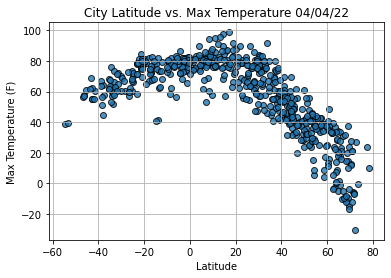

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

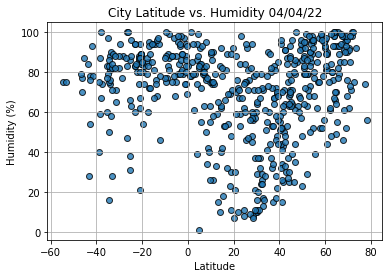

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

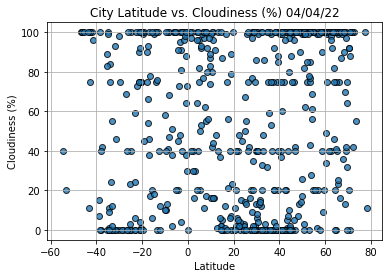

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

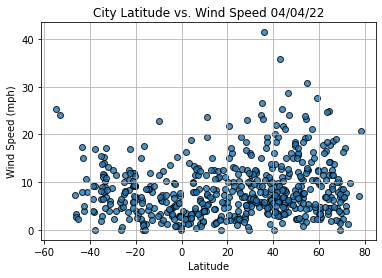

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [68]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [61]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

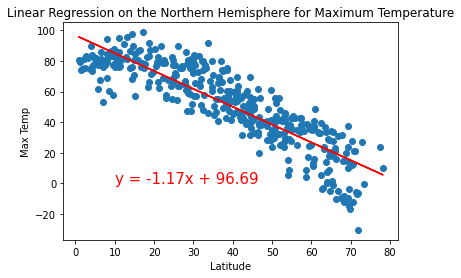

LinregressResult(slope=-1.165823257693863, intercept=96.69255548861, rvalue=-0.8735254368206233, pvalue=1.4376444104996223e-125, stderr=0.03268812441025369, intercept_stderr=1.4221690881218496)

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,0))
linregress(x_values, y_values)

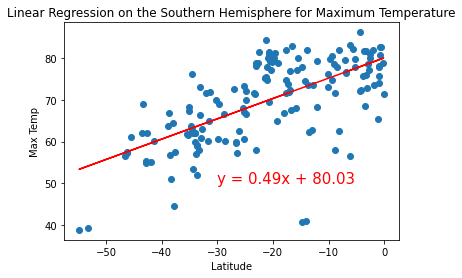

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,50))


In [82]:
linregress(x_values, y_values)

LinregressResult(slope=0.4864409098664037, intercept=80.03479849239318, rvalue=0.6467273766110998, pvalue=3.313557949837415e-20, stderr=0.04578517357796879, intercept_stderr=1.1413861346620835)

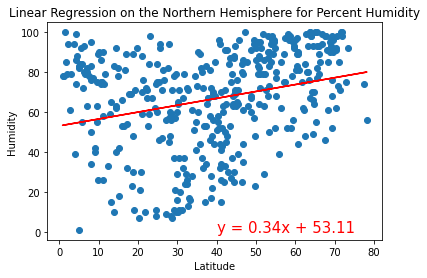

LinregressResult(slope=0.3447586091133649, intercept=53.10844103538327, rvalue=0.27406161501144055, pvalue=2.8560710607387637e-08, stderr=0.06087142317353517, intercept_stderr=2.6483457815104994)

In [94]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Percent Humidity', 'Humidity',(40,0))
linregress(x_values, y_values)

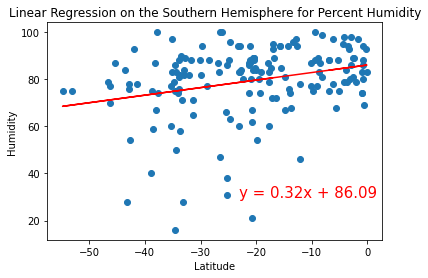

LinregressResult(slope=0.32063142588197335, intercept=86.08534135908616, rvalue=0.2757405107881079, pvalue=0.0004348537903525443, stderr=0.0892039231256438, intercept_stderr=2.223779294834098)

In [95]:
# Linear regression on the Southern Hemisphere - humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Percent Humidity', 'Humidity',(-23,30))
linregress(x_values, y_values)

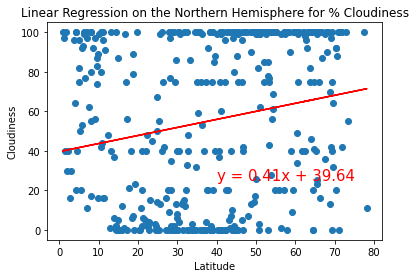

LinregressResult(slope=0.40671138199916207, intercept=39.636018267142724, rvalue=0.19651032856880385, pvalue=8.094234544824591e-05, stderr=0.10210588456378339, intercept_stderr=4.442342146018028)

In [97]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(40,25))
linregress(x_values, y_values)

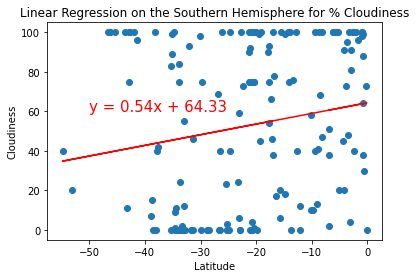

LinregressResult(slope=0.5391817459904112, intercept=64.33147126068928, rvalue=0.17708681531946044, pvalue=0.025546295754444132, stderr=0.23915550637865848, intercept_stderr=5.961947016403562)

In [100]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Cloudiness',(-50,60))
linregress(x_values, y_values)

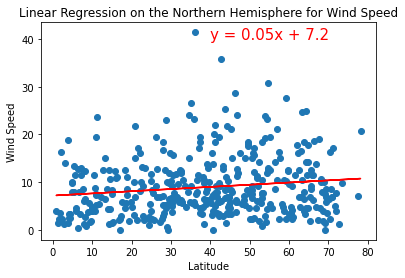

LinregressResult(slope=0.045534992794387066, intercept=7.1980829921553315, rvalue=0.1433359884198489, pvalue=0.004213291423737836, stderr=0.015819169409899407, intercept_stderr=0.6882479230733904)

In [103]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,40))
linregress(x_values, y_values)

In [ ]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,60))
linregress(x_values, y_values)